In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

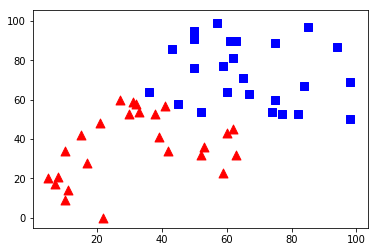

In [96]:
DataRojo = np.random.randint(0,65,(25,2)).astype(np.float32)
DataAzul = np.random.randint(35,100,(25,2)).astype(np.float32)
clasificaciones = np.concatenate([-np.ones(25),np.ones(25)]).astype(np.int32)
Data=np.concatenate([DataRojo,DataAzul])

plt.scatter(DataRojo[:,0],DataRojo[:,1],80,'r','^')
plt.scatter(DataAzul[:,0],DataAzul[:,1],80,'b','s')

plt.show()

In [100]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setGamma(10)
svm.setC(10)
svm.train(Data,cv2.ml.ROW_SAMPLE,clasificaciones)

True

In [101]:
height=100
width=100
imagen=np.zeros((height,width,3),dtype=np.uint8)

rojo=(255,150,0)
azul=(0,150,255)

for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]):
        sampleMat = np.matrix([[j,i]], dtype=np.float32)
        response = svm.predict(sampleMat)[1]
        if response == 1:
            imagen[i,j] = azul
        elif response == -1:
            imagen[i,j] = rojo
            
for i in range(len(DataRojo)):
    cv2.circle(imagen,(DataRojo[i,0],DataRojo[i,1]),2,(250,0,0))
    
for i in range(len(DataAzul)):
    cv2.circle(imagen,(DataAzul[i,0],DataAzul[i,1]),2,(0,0,250))
    

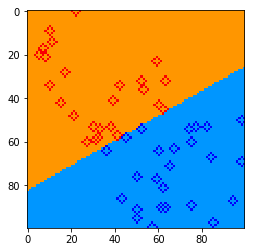

In [102]:
plt.imshow(imagen)